# MNIST machine learning exercise

In this exercise we will demonstrate the use of Keras and Keras Tune to identify a feedforward neural network that best predicts the a handwritten digit. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

# 1.0 Load and explore data (shouldn't need any transformations)

For repeatability, set random seed for both numpy and tensorflow.

In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
from sklearn import datasets

mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [3]:
type(mnist)

sklearn.utils.Bunch

Notice that the dataset is stored in a Bunch type (see sklearn https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

We can view this dataset as similar to a dictionary; we can look at all the keys by doing the following:

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

If we want the number of images, we can use the len function.

In [7]:
print(len(mnist.data))

1797


And, for each image we have a target value

In [8]:
print(len(mnist.target))

1797


To identify any issues with data imbalance, let's look at the number of observations for each digit 

In [9]:
import collections

counts = collections.Counter(mnist.target)
counts

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

We can also look at this as a barplot to visualize the data balance...

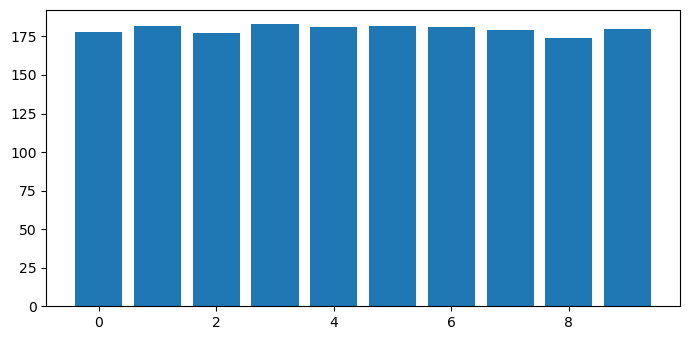

In [10]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(counts.keys(), counts.values())

# Display the plot
plt.show()

We can use matplotlib to display a sample of these images from the data.

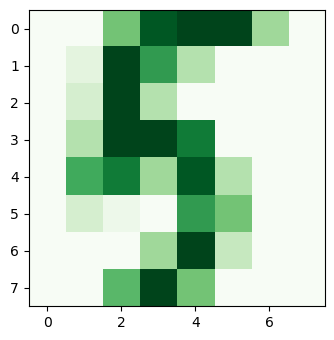

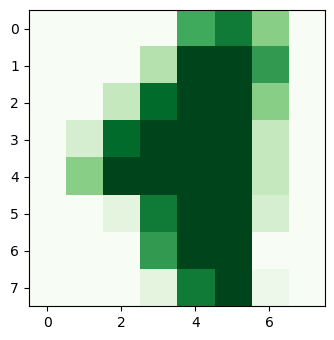

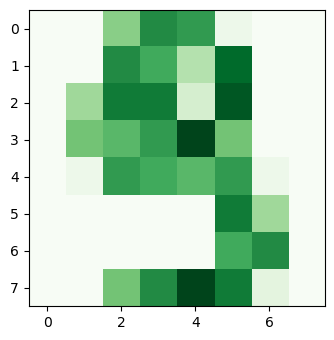

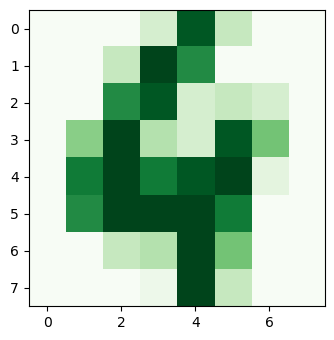

In [11]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
    plt.imshow(mnist.images[i], cmap='Greens')
    plt.show()

# 2.0 Model data using Keras sequential neural networks

Split data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

Create a unique log directory name (to store logs for later analysis using tensorboard)

## 2.Wide and Deep Network

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
input_ = keras.layers.Input(64)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(10, activation="softmax")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [15]:
model_wide_deep.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
history = model_wide_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
45/45 [==============================] - 1s 8ms/step - loss: 1.6829 - accuracy: 0.6625 - val_loss: 0.3063 - val_accuracy: 0.8917
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.9019 - val_loss: 0.2464 - val_accuracy: 0.9306
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9422 - val_loss: 0.1595 - val_accuracy: 0.9583
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9534 - val_loss: 0.1665 - val_accuracy: 0.9444
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9645 - val_loss: 0.1397 - val_accuracy: 0.9611
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9749 - val_loss: 0.1212 - val_accuracy: 0.9722
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9840 - val_loss: 0.1353 - val_accuracy: 0.9583
Epoch 8/50
45/45 [==

In [19]:
c = model_wide_deep.evaluate(X_test,y_test)
loss = np.round(c[0],3)
Accuracy  = np.round(c[1],3)*100
print("loss:", loss)
print("Accuracy:", Accuracy)

12/12 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9806
loss: 0.09
Accuracy: 98.1


In [23]:
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)

12/12 [==============================] - 0s 1ms/step


In [20]:
model_wide_deep.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          8320        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 128)          16512       ['dense_1[0][0]']                
                                                                                              

<function matplotlib.pyplot.show(close=None, block=None)>

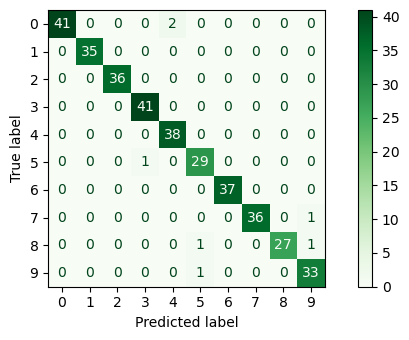

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp  = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens')
plt.show

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9535    0.9762        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    1.0000    1.0000        36
           3     0.9762    1.0000    0.9880        41
           4     0.9500    1.0000    0.9744        38
           5     0.9355    0.9667    0.9508        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9310    0.9643        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9806       360
   macro avg     0.9805    0.9795    0.9796       360
weighted avg     0.9812    0.9806    0.9806       360

